# Forced Harmonic Oscillator (Notebook 2)

In this notebook we explore the dynamics and behaviour of a one dimensional forced harmonic oscillator. We use the same code for the harmonic oscillator as before in our first notebook.



The forced harmonic oscillator has the following equation:

$m \ddot x(t) + \gamma m \dot x(t) + m x(t) = f(t) $

We can solve this equation analytically by taking the Laplace Transform of this equation

$  s^2F(s) - f(0) - f'(0) + \gamma sF(s) - f(0) + m F(s) = \frac{1}{m} L(f(t)) $

$  -\omega^2 \tilde{x} + \gamma \omega \tilde{x} + \tilde{x} = \frac{1}{m} F(f(t)) $

$  (-\omega^2 + \gamma \omega + 1)\tilde{x} = \frac{1}{m} F(f(t)) $

$  \tilde{x} = \frac{1}{m(-\omega^2 + \gamma \omega + 1)} F(f(t)) $

In [ ]:
$  x(t) = \frac{1}{m(-\omega^2 + \gamma \omega + 1)} F(f(t)) $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift

In [2]:
omega0 = 100
gamma = 2

In [3]:
""" """
def dvdt1(x, y, z):
    return -omega0 * y - gamma * z

""" """
def dxdt1(x, y, z):
    return z

In [4]:
def RungeKuttaCoupled1(x, y, z, dx, dydx, dzdx):
    # x --> t
    # y --> x
    # z --> v
    # dydx --> dx/dt = v
    # dzdx --> dv/dt = -x
    
    k1 = dx*dydx(x, y, z)
    h1 = dx*dzdx(x, y, z)
    k2 = dx*dydx(x+dx/2., y+k1/2., z+h1/2.)
    h2 = dx*dzdx(x+dx/2., y+k1/2., z+h1/2.)
    k3 = dx*dydx(x+dx/2., y+k2/2., z+h2/2.)
    h3 = dx*dzdx(x+dx/2., y+k2/2., z+h2/2.)
    k4 = dx*dydx(x+dx, y+k3, z+h3)
    h4 = dx*dzdx(x+dx, y+k3, z+h3)

    y = y + 1./6.*(k1+2*k2+2*k3+k4)
    z = z + 1./6.*(h1+2*h2+2*h3+h4)
    #x = x + dx
    
    return y, z

In [5]:
_TIME_STEP = 0.01

In [6]:
_INITAL_POSITION = 3
_INITAL_VELOCITY = 0

In [7]:
_N_TIME_STEPS = int(1e4)

In [8]:
time = 0
dt = _TIME_STEP
t_end = _N_TIME_STEPS * _TIME_STEP

In [9]:
positions = np.zeros(_N_TIME_STEPS)
velocities = np.zeros(_N_TIME_STEPS)
forces = np.zeros(_N_TIME_STEPS)

ENERGY = np.zeros(_N_TIME_STEPS)

In [10]:
positions[0] = _INITAL_POSITION
velocities[0] = _INITAL_VELOCITY

In [11]:
for step in range(_N_TIME_STEPS - 1):
    p, v = RungeKuttaCoupled1(time, positions[step], velocities[step], dt, dxdt1, dvdt1)
    positions[step + 1] = p
    
    if(step % 2000 == 0):
        print("works?")
        velocities[step + 1] = v + 100.0
    else:
        velocities[step + 1] = v
        
        
    time = time + dt

works?
works?
works?
works?
works?


In [12]:
positions;

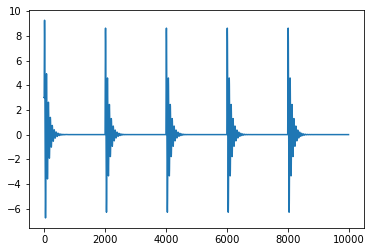

In [13]:
plt.plot(positions)

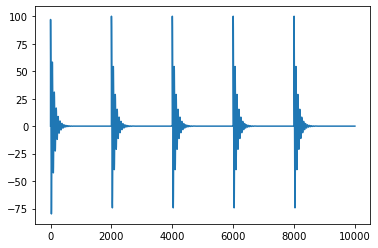

In [14]:
plt.plot(velocities)

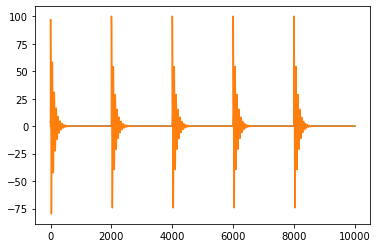

In [15]:
plt.plot(positions)
plt.plot(velocities)

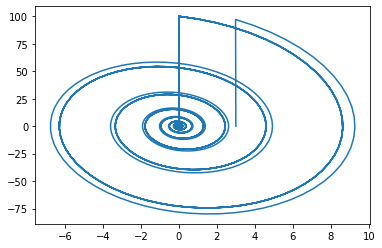

In [16]:
plt.plot(positions, velocities)

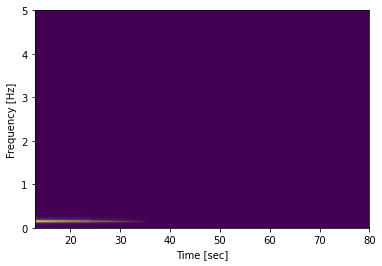

In [17]:
fs = 10
N = 1e5
f, t, Sxx = signal.spectrogram(positions[:1000], fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
df = f[3] - f[2]
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## Part 2
### Functionalizing the Code

The code above works very well, however if we want to simulate many harmonic oscillator trials with different parameters such as mass, or time step we would need to copy the code many time over again. To simplifiy and compartmentalize the code we can wrap the above code into a HARMONIC_SIMULATION() routine.

In [88]:
def HARMONIC_SIMULATION(omega0 = 1000, gamma = 2, mass = 1, _TIME_STEP = 0.001,
    _INITAL_POSITION = 3,
    _INITAL_VELOCITY = 0,
    _N_TIME_STEPS = int(1e4),
    force = lambda x: 0
                       ):
    
    """ """
    def dvdt1(x, y, z):
        return -mass * omega0 * y - mass * gamma * z - (1/mass) * force(x)

    """ """
    def dxdt1(x, y, z):
        return z
    
    def RungeKuttaCoupled1(x, y, z, dx, dydx, dzdx):
        # x --> t
        # y --> x
        # z --> v
        # dydx --> dx/dt = v
        # dzdx --> dv/dt = -x

        k1 = dx*dydx(x, y, z)
        h1 = dx*dzdx(x, y, z)
        k2 = dx*dydx(x+dx/2., y+k1/2., z+h1/2.)
        h2 = dx*dzdx(x+dx/2., y+k1/2., z+h1/2.)
        k3 = dx*dydx(x+dx/2., y+k2/2., z+h2/2.)
        h3 = dx*dzdx(x+dx/2., y+k2/2., z+h2/2.)
        k4 = dx*dydx(x+dx, y+k3, z+h3)
        h4 = dx*dzdx(x+dx, y+k3, z+h3)

        y = y + 1./6.*(k1+2*k2+2*k3+k4)
        z = z + 1./6.*(h1+2*h2+2*h3+h4)
        #x = x + dx

        return y, z
    
    
    
    time = 0
    dt = _TIME_STEP
    t_end = _N_TIME_STEPS * _TIME_STEP
    
    positions = np.zeros(_N_TIME_STEPS)
    velocities = np.zeros(_N_TIME_STEPS)
    forces = np.zeros(_N_TIME_STEPS)

    ENERGY = np.zeros(_N_TIME_STEPS)
    
    
    positions[0] = _INITAL_POSITION
    velocities[0] = _INITAL_VELOCITY
    
    
    for step in range(_N_TIME_STEPS - 1):
        p, v = RungeKuttaCoupled1(time, positions[step], velocities[step], dt, dxdt1, dvdt1)
        positions[step + 1] = p

        if(step % 2000 == 0):
            velocities[step + 1] = v #+ 100.0
        else:
            velocities[step + 1] = v


        time = time + dt
    
    return positions, velocities

In [89]:
x, v = HARMONIC_SIMULATION(_N_TIME_STEPS=9000)

Text(0, 0.5, 'q')

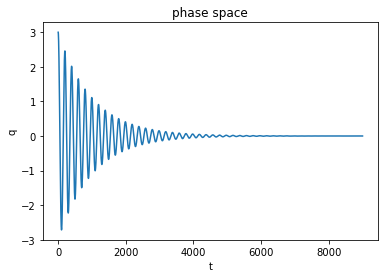

In [90]:
plt.plot(x)
plt.title("phase space")
plt.xlabel("t")
plt.ylabel("q")

Text(0, 0.5, 'v')

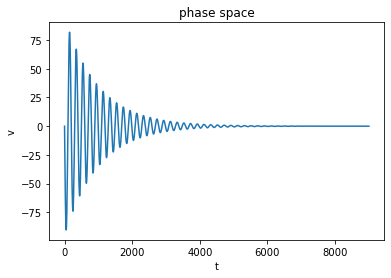

In [91]:
plt.plot(v)
plt.title("phase space")
plt.xlabel("t")
plt.ylabel("v")

Text(0, 0.5, 'q')

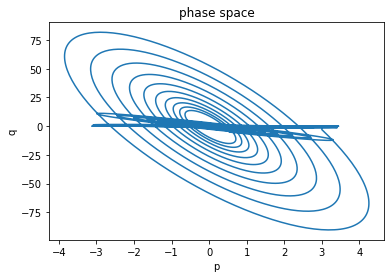

In [92]:
plt.plot(p, v)
plt.title("phase space")
plt.xlabel("p")
plt.ylabel("q")

In [93]:
#sinusoidal force

In [117]:
x, v = HARMONIC_SIMULATION(gamma = 0.5, _N_TIME_STEPS=100000, force=lambda t: 1000 * np.sin(t))

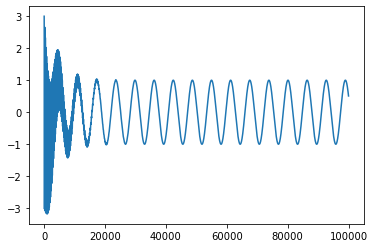

In [118]:
plt.plot(x)

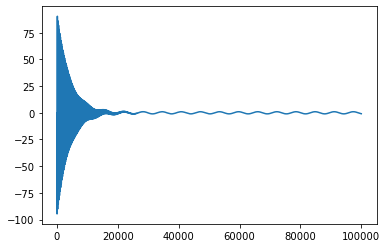

In [119]:
plt.plot(v)

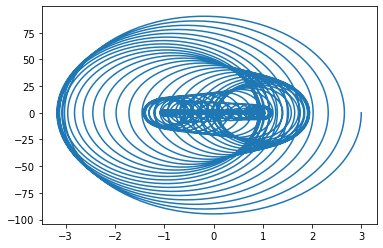

In [120]:
plt.plot(x, v)

In [ ]:
x, v = HARMONIC_SIMULATION(gamma = 0.5, _N_TIME_STEPS=100000, force=lambda t: 1000 * (np.sin(t) + (1/3) * np.sin(3 * t) + (1/5) *np.sin(5 * t) + (1/7) *np.sin(7 * t) + np.sin(9 * t))
                           
                           
                           
                           
                           

In [18]:
#periodic kicking 

In [ ]:
#Simulating a stochastic Oscillator